# Marches aléatoires auto-sécantes
___
## Description du problème

On définit :
* $(X_t)_{t \geq 0}$ est une marche aléatoire dans $\mathbb{Z}^d$ d'origine $(0,..,0)$.
* $(L_i)_{i \geq 0}$ est la longueur parcourue depuis la dernière "autosection" sur la même marche aléatoire $(X_t)_{t \geq 0}$. On appelle "autosection" l'événement $AS_t = [X_t \in \{X_s\}_{s < t}]$. Pour $i$ donné, $L_i$ est donc la longueur parcourue entre la $i-1^{\text{ème}}$ et la $i^{\text{ème}}$ autosection réalisées.
* **L'objectif de ce projet est d'étudier le comportement des $(L_i)_{i \geq 0}$**.

Remarques préliminaires :
* **Le caractère iid des $(L_i)_{i \geq 0}$ n'est pas établi**, il est difficile de montrer que les variables ont la même distribution et qu'elles sont indépendantes. On peut ainsi se placer dans 2 cas distincts.
    * Soit on émet l'hypothèse qu'elles sont iid et on peut appliquer les méthodes de Monte Carlo sur la même trajectoire de $(X_t)_{t \geq 0}$. L'approche est 

    $$
    \forall i \geq 0, \quad \mathbb{P}(L=l) = \mathbb{E}[\mathbb{1}_{\{l\}}(L)] \sim \frac{1}{N} \sum_{j=1}^{N}\mathbb{1}_{\{l\}}(L_{j})
    $$

    * Soit on doit réaliser $N$ trajectoires différentes, pour avoir $N$ réalisations différentes de la suite $(L_i)_{i \geq 0}$, et l'on applique les méthodes de Monte Carlo sur le regroupement des $N$ $L_i$, pour $i$ fixé. L'approche est alors

    $$
    \forall i \geq 0, \quad \mathbb{P}(L_i=l) = \mathbb{E}[\mathbb{1}_{\{l\}}(L_i)] \sim \frac{1}{N} \sum_{j=1}^{N}\mathbb{1}_{\{l\}}(L_{i,j})
    $$

* $(X_t)_{t \geq 0}$ est une somme de "directions" mutuellement indépendantes, de loi uniforme sur l'ensemble des directions possibles : $\forall t \geq 0, X_t = \sum_{i=1}^{t} U_i$ où

    $$
    \begin{align*}

    \\
    \forall i \geq 0 : \quad U_i \overset{\text{i.i.d.}}{\sim} \cal{U}(\underbrace{\begin{bmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix},\begin{bmatrix} -1 \\ 0 \\ \vdots \\ 0 \end{bmatrix}, \cdots , \begin{bmatrix} 0 \\ \vdots \\ 0 \\ 1 \end{bmatrix}, \begin{bmatrix} 0 \\ \vdots \\ 0 \\ -1 \end{bmatrix}}_\cal{D})

    \\
    \end{align*}

    $$

    Ainsi la méthode classique pour simuler de telles marches aléatoires est de simuler $(U_t)_{t \geq 0}$ et de poser $(X_t)_{t \geq 0} = (\sum_{j=1}^{t}U_j)_{t \geq 0}$.

* On peut montrer que :
    $$
    \begin{align}
    L_0 & = \sum_{t=1}^{\infty} \prod_{j=1}^{t} \mathbb{1}_{\overline{\{X_j\}}}(X_t)

    \\
    \\

    &= \sigma_1

    \\
    \\
    \\

    \forall i \geq 1, \quad L_i &= \sum_{t=(\underbrace{\sum_{k=0}^{i-1} L_k}_{\sigma_i})+1}^{\infty} \prod_{j=(\sum_{k=0}^{i-1} L_k)+1} \mathbb{1}_{\overline{\{0\}}}(\sum_{a=1}^{t-j} U_{a+j})

    \\
    \\

    &= \sigma_i - \sigma_{i-1}

    \\
    \\
    \end{align}
    $$
    où $\sigma_i$ est le temps d'attente de la $i^{\text{ème}}$ autosection (on pose $\sigma_0 = 0$).

* Ainsi déterminer de manière analytique la distribution et l'indépendance des $(L_i)_{i \geq 0}$ peut s'avérer compliqué. Nous allons recourrir à des méthodes de Monte Carlo et des tests pour en connaître la plausibilité, en plus de ce qui est demandé dans les questions.
    1. On simule $N$ trajectoires à l'aide d'une boucle while pour avoir un même nombre de fois ($N$ fois) chaque $L_i$. Alternativement, pour contrôler le temps de calcul, on n'utilise pas une boucle while mais on prend la taille $Q$ de la réalisation $(L_i)_{i \leq Q}$ la plus courte et on tronque toutes les réalisations à $Q$ élements.
    2. On regroupe les $L_{i,j}$ par i.
    3. On teste l'indépendance et l'identité en loi.

<br />

### Plan du projet:

**Question 1** - *Simulation de base*


1. Simuler de manière traditionnelle une marche aléatoire ainsi que la suite $(L_i)_{i \geq 0}$ et appliquer la méthode de Monte Carlo sous hypothèse iid sur une même marche pour en déduire la distribution des $(L_i)_{i \geq 0}$. Répéter pour plusieurs longueurs de marches différentes.
2. Simuler de manière traditionnelle $N$ marches aléatoires et ainsi $N$ suites $(L_{ij})_{i \geq 0}$, $j \in [[1;N]]$ et appliquer la méthode de Monte Carlo sans l'hypothèse iid sur une même marche pour en déduire la distribution des $(L_i)_{i \geq 0}$.
3. Commenter les résultats en testant l'hypothèse de distribution identique et d'indépendance.

**Question 2** - *Amélioration de la simulation par stratification*


1. Confirmer la validité d'une approche différente de la simulation de la marche aléatoire : l'hypercube latin.
2. Simuler à l'aide de cette nouvelle méthode $N$ marches aléatoires et ainsi $N$ suites $(L_{i,j})_{i \geq 0}$, $j \in [[1;N]]$ et appliquer la méthode de Monte Carlo sans l'hypothèse iid sur une même marche pour en déduire la distribution des $(L_i)_{i \geq 0}$. Répéter pour plusieurs longueurs de marches différentes.
3. Comparer les variances des estimations des $\mathbb{P}(L_i = l)$ pour $i$ parcourant un ensemble raisonnable de valeurs.


**Question 3** - *Evaluation de $\mathbb{P}(L_i \geq l)$ par méthode de Monte Carlo et importance sampling*


1. Expliquer le problème que pose $t$ grand et $l \leq t$ proche de t.
2. Elaborer un algorithme d'importance sampling pour générer plus de L_i grands, commencer avec une loi de proposition g de départ.
3. Proposition de nouvelles lois de proposition et comparaison. 

<br />




In [1]:
''' Importation des packages '''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1 - Simulation de base (en dimension 2)
### 1 - Simulation d'une seule marche aléatoire

On commence par simuler une seule marche aléatoire $(X_t)_{t \geq 0}$, puis une seule suite $(L_i)_{i \geq 0}$. Voici les étapes :

1. Simuler $(U_t)_{0 \leq t \leq T}$
2. Calculer $(X_t)_{1 \leq t \leq T} = (\sum_{j=1}^{t}U_j)_{t \geq 0}$ et poser $X_0 = \begin{bmatrix} 0 \\ \vdots \\ 0 \end{bmatrix}$
3. Calculer $(L_i)_{0 \leq i \leq Q-1}$ où $Q$ est le nombre d'autosections (en pratique on recense les longueurs des chaînes et on enlèvera la dernière longueur qui n'est pas "achevée").
4. Plot des résultats. Les histogrammes sont de fait une estimation Monte Carlo de la distribution des $(L_i)_{i \geq 0}$, en supposant qu'ils sont iid.

In [2]:
''' Simulation des U_t '''

T = 100 # On commence par définir un horizon de temps T
d = 2 # On établit également la dimension du problème

def ute(d,T):
    # Afin de créer le support D de la loi uniforme sur toutes les directions possibles, on sépare directions positives et négatives qu'on concatène dans un second temps

    directions_positives = [] # On crée toutes les directions positives
    for i in range(d): # Pour chaque dimension
        directions_positives.append(np.zeros(d)) # On ajoute la direction où on se déplace de +1 dans la direction i
        directions_positives[i][i] = 1

    directions_negatives = [] # On fait la même chose avec les directions négatives
    for i in range(d):
        directions_negatives.append(np.zeros(d))
        directions_negatives[i][i] = -1

    D = directions_positives + directions_negatives # Il s'agit du support de la loi uniforme.
    U = [D[np.random.choice(range(2*d))] for t in range(T)] # On simule les U_t grâce à np.random.choice sur le support D
    U = pd.Series(U)
    return U
# On obtient une série de directions aléatoires U, qui simule les U_t.

In [3]:
''' Calcul des X_t '''

def ixte(d,T): 
    U = ute(d,T)
    X = U.cumsum().shift(periods=1) # On calcule les X_t selon la méthode traditionnelle
    X[0] = np.zeros(2) # On pose X_0 = 0
    return X

In [15]:
''' Calcul des L_i '''

def eli(d,T,X=False): # On ajoute une option pour pouvoir juste compter les L_i sur un X existant
    # Pour des raisons de simplicité, on convertit la série X en str (il sera alors bien plus facile de vérifier les égalités)
    if type(X)==bool:
        X=ixte(d,T)

    X_check = X.map(str) # Les éléments de X_check sont des chaînes de caractères
    L = []
    chemin_parcouru = 0
    for index, elt in enumerate(X_check):
        if any(X_check.iloc[:index].isin([elt])): # AS_t est-il réalisé ?
            L.append(chemin_parcouru) # Si oui, on enregistre la longueur du chemin parcouru, réalisation de L_i
            chemin_parcouru = 0 # Puis on réinitialise la variable
        else:
            chemin_parcouru += 1 # Sinon, on incrémente la variable

    L = pd.Series(L) # Par souci d'uniformité des formats, on convertit L en série
    if L[len(L)-1] != 0:
        L.drop(index=len(L)-1, inplace=True) # On enlève la dernière réalisation si elle n'est pas nulle, pour éviter les problèmes de censure des résultats (en effet si c'est différent de 0, alors il n'y a pas autosection en T et donc L_T n'est pas forcément la dernière valeur enregistrée mais peut être supérieure.)
    return L

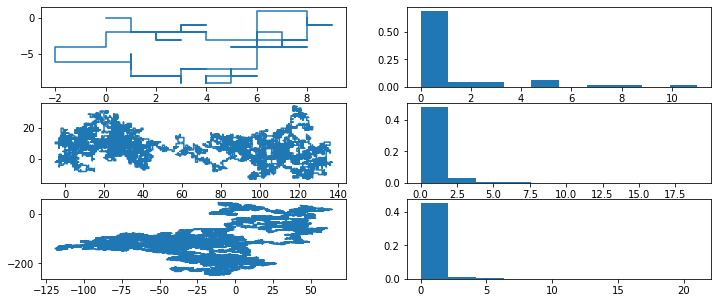

In [23]:
''' Résultats : plot des X_t et des L_i dans le cas d=2 '''

d, T1, T2, T3 = 2, 100, 10000, 50000

x1, y1, x2, y2, x3, y3 = [], [], [], [], [], [] # Il n'y a que 2 dimensions dans ce cas
X1, X2, X3 = ixte(d, T1), ixte(d, T2), ixte(d, T3)
L1, L2, L3 = eli(d,T1,X1), eli(d, T2, X2), eli(d, T3, X3)

for i in range(T1):
    x1.append(X1.values[i][0]) # Abscisses
    y1.append(X1.values[i][1]) # Ordonnées

for i in range(T2):
    x2.append(X2.values[i][0]) 
    y2.append(X2.values[i][1])

for i in range(T3):
    x3.append(X3.values[i][0])
    y3.append(X3.values[i][1])

fig, axs = plt.subplots(3,2,figsize=(12,5))

axs[0,0].plot(x1,y1)
axs[0,1].hist(L1, density=True)
axs[1,0].plot(x2,y2)
axs[1,1].hist(L2, density=True)
axs[2,0].plot(x3,y3)
axs[2,1].hist(L3, density=True)
plt.show()

Au vu des histogrammes, il est difficile de déterminer si la loi se stabilise lorsque T tend vers $+ \infty$. En effet, à part le fait que la valeur $0$ est très fréquente, il est difficile d'apprécier la distribution sur les autres valeurs. Pour remédier à cela, nous allons replotter les mêmes simulations en excluant les cas où $L_i = 0$ (cela revient donc à estimer par Monte Carlo $\mathbb{P}(L = l \mid L > 0)$ pour $l > 0$).

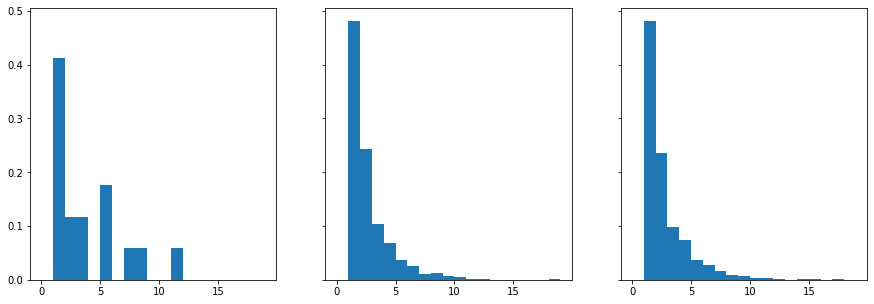

In [37]:
''' Plot conditionnellement à L_i >= 1 '''

fig2, axs2 = plt.subplots(1,3,figsize=(15,5), sharey=True)

axs2[0].hist(L1[L1 != 0], density=True, bins=range(20))
axs2[1].hist(L2[L2 != 0], density=True, bins=range(20))
axs2[2].hist(L3[L3 != 0], density=True, bins=range(20))
plt.show()

Conditionnellement à $L_i \geq 1$, **la loi semble se stabiliser lorsque la longueur augmente**. Toutefois, étant donné que la queue de la distribution est très fine, on peut penser que **les probabilités d'apparition des grandes et moyennes valeurs de L est très faible**. Ceci est problématique lorsque l'on simule des quantités non-asymptotiques de $L_i$. En effet, la (grande) variance (cf histogrammes réalisés pour T=100) peut être source de piètre performance des estimations par méthode de Monte Carlo. 

De plus, capturer des bonnes estimation de $\mathbb{P}(L_i = l)$ pour $l$ grand peut s'avérer délicat au vu de la peu fréquente apparition des grandes valeurs de L. Cela est d'autant plus difficile que le calcul des $(L_i)_{i \geq 0}$ est coûteux.

On peut ainsi envisager d'améliorer la simulation des $(L_i)_{i \geq 0}$ grâce à des méthodes de réduction de la variance (dans un 1er temps) puis par l'importance sampling (dans un 2e temps).

Avant cela, nous allons quand même vérifier le caractère iid des $(L_i)_{i \geq 0}$, bien que la loi semble se stabiliser avec la longueur de la marche aléatoire, ce qui plaide en la faveur de cette hypothèse.

### 2 - Simulation de $N$ marches aléatoires
Nous relâchons l'hypothèse que les $(L_i)_{i \geq 0}$ sont iid. Nous allons ainsi simuler $N$ trajectoires (avec la méthode classique) de $(X_t)_{t \geq 0}$, et en déduire $N$ familles $(L_{i,j})_{i \geq 0}, \: \: j \in [[1:N]]$.

Pour des raisons de performance, nous allons seulement simuler pour des longueurs de marche aléatoire assez courtes (T inférieur à 1000).


In [83]:
''' Création des N marches aléatoires X_tj '''

N = 1000 # On détermine le nombre de marches aléatoires à simuler
d = 2 # On se place en dimension 2
T = 1000 # On fixe un horizon de temps limité

X = [] # On crée une liste qui contient les N trajectoires
for j in range(N):
    X.append(ixte(d,T))

In [84]:
''' Calcul des L_ij - approche par troncature au plus petit échantillon '''

L = [] # On crée une liste qui contient les N réalisations des suites L_ij
for j in range(N):
    L.append(eli(d,T,X[j]))

Q = min([len(elt) for elt in L]) # On détermine la taille minimale des suites

L_regroup = pd.DataFrame() # DataFrame permettant de regrouper les L_ij comme réalisations iid (par construction) de L_i. On choisit le format dataframe qui va faciliter les calculs
for i in range(Q): # Pour i allant de 0 à Q-1, on regroupe les L_i
    L_regroup[i] = pd.Series([L[j][i] for j in range(N)]) # On peut noter que L_regroup.T = (L_ij)_i,j

# Chaque colonne contient N réalisations de L_i
# On a ainsi N réalisations de L_i, pour i allant jusqu'à Q

In [106]:
range(25)

range(0, 25)

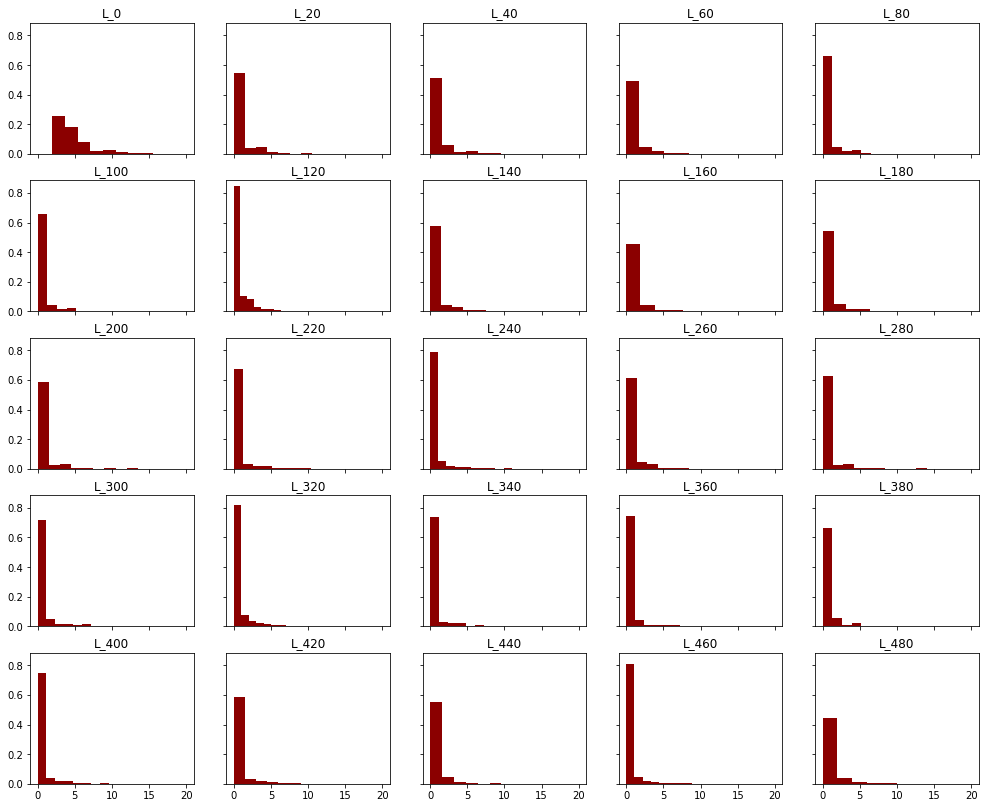

In [110]:
''' Résultats bis : plot des distributions pour L_i, i décrivant plusieurs valeurs '''

# Ici, nous laissons T constant

fig3, axs3 = plt.subplots(5, 5, figsize=(17,14), sharey=True, sharex=True)

for i in range(25):
    axs3[i//5,i%5].hist(L_regroup[np.arange(0,500,20)[i]], density=True, color='darkred')
    axs3[i//5,i%5].set_title("L_"+str(np.arange(0,500,20)[i]))

plt.show()

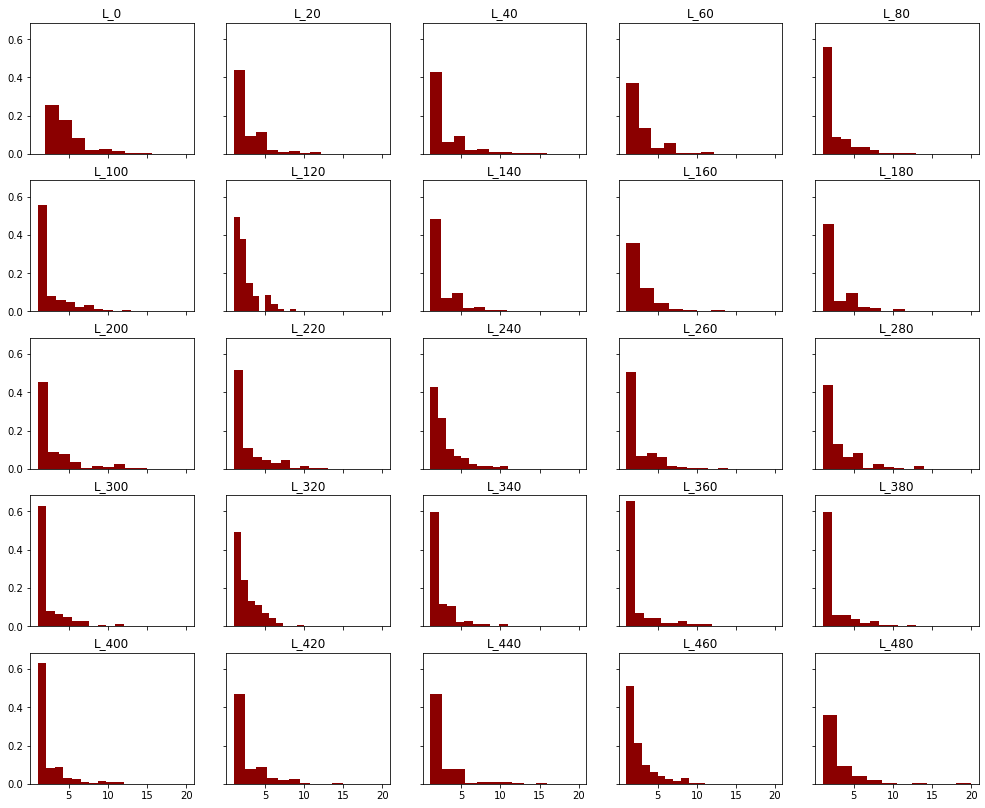

In [119]:
''' Résultats ter : plot conditionnels à L >= 1 '''

fig4, axs4 = plt.subplots(5, 5, figsize=(17,14), sharey=True, sharex=True)

for i in range(25):
    axs4[i//5,i%5].hist(L_regroup[np.arange(0,500,20)[i]][L_regroup[np.arange(0,500,20)[i]]>0], density=True, color='darkred')
    axs4[i//5,i%5].set_title("L_"+str(np.arange(0,500,20)[i]))

plt.show()

On remarque que $L_0$ a une distribution assez différente des autres $L_i, i \geq 1$. Aussi, les distributions, bien que grossièrement similaires, sont assez variables.

Outre ceci, les résultats semblent assez similaires aux précédents (queue très fine de la distribution).

### 3 - Les $(L_i)_{i \geq 0}$ sont-ils iid ?

Nous allons à présent utiliser le dataset L_regroup pour tester cette hypothèse.

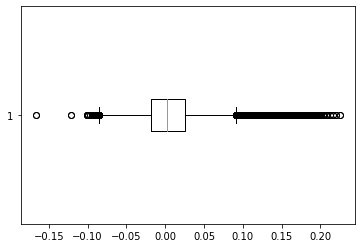

In [90]:
''' Y a-t-il corrélation entre les L_i ? '''

plt.boxplot(L_regroup.corr().values[L_regroup.corr().values != 1.], vert=False)
plt.show()

La corrélation moyenne est assez faible en moyenne, mais il y a beaucoup d'outliers qui nous empêchent de généraliser l'absence de corrélation.

In [ ]:
''' Test d'indépendance mutuelle '''



In [ ]:
''' Test d'identique distribution '''


## Question 2 - Amélioration de la simulation par stratification

On cherche à améliorer la simulation (diminution de variance des estimations par Monte Carlo). Pour cela, une première piste est d'appliquer une méthode de Quasi-Monte Carlo, la stratification (Latin Hypercube), qui est proposée dans l'énoncé.

### 1 - Validation de la simulation par stratification

On veut $N$ trajectoires. On sait que $$\begin{align*}  \forall (i,t) \in [[1;N]], \, \mathbb{N} : \quad U_{it} \sim \cal{U}(\underbrace{\begin{bmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix},\begin{bmatrix} -1 \\ 0 \\ \vdots \\ 0 \end{bmatrix}, \cdots , \begin{bmatrix} 0 \\ \vdots \\ 0 \\ 1 \end{bmatrix}, \begin{bmatrix} 0 \\ \vdots \\ 0 \\ -1 \end{bmatrix}}_\cal{D}) \end{align*}$$ 

On note $\cal{D}_k$ l'ensemble ordonné contenant $k$ fois chaque élément de D, avec $k$ tel que $2dk = N$.

Au lieu de poser $(X_t)_{t \geq 0} = (\sum_{j=1}^{t}U_j)_{t \geq 0}$, on simule chaque trajectoire $i \in [[1:N]]$ en faisant
$$
\begin{align*}
(X_{it})_{t \geq 0} \: = \: (\sum_{j=1}^{t} perm_j(\cal{D}_k)_i)_{t \geq 0}
\end{align*}
$$

où $perm_j(D_k)$ est la $j^{\text{ème}}$ permutation de $\cal{D_k}$, et $perm_j(\cal{D}_k)_i$ sont $i^{\text{ème}}$ élément.

On veut maintenant savoir si $\forall t \geq 0 , \sum_{j=1}^{t} perm_j(\cal{D}_k)_i$ a la même loi que $\sum_{j=1}^{t} U_{ij}$. On peut alors se cantonner à montrer que 

$$
\begin{align*}
\\
\forall j \in [[1;t]], \begin{cases} perm_j(\cal{D}_k)_i \sim \cal{U}(\cal{D}) \\ \text{Les permutations sont mutuellement indépendantes} \end{cases}
\\
\\
\end{align*}
$$

Par construction, la 2e affirmation est vraie. Quant à la 1e :

$$
\begin{align*}
\forall v \in \cal{D}, \quad \mathbb{P}(perm_j(\cal{D}_k)_i \, = \, v) & = \frac{\text{Nombre de cas favorables}}{\text{Nombre de cas possibles}} \\ \\

&= \frac{\overbrace{k}^{\text{Nombre de vecteurs} \\ \text{prenant la valeur de v}} \times \overbrace{(2dk - 1)!}^{\text{Nombre de permutations sur les 2dk-1} \\ \text{valeurs, après avoir fixé le rang i}}}{(2dk)!} \\ \\

&= \frac{1}{2d}

\\
\end{align*}
$$

<br />

Elle est aussi vraie. On en conclue que l'approche par stratification (Latin Hypercube) est valide.

### 2 - Mise en oeuvre de l'approche par stratification



In [ ]:
''' Construction des T permutations de D_k '''

N = 100
d = 2
T = 100
